In [15]:
from math import *
import numpy as np
from qutip import *
from qutip import bloch
import matplotlib.pyplot as plt
from scipy.linalg import expm, fractional_matrix_power
import cmath

#########################################################################

# pauli matrix 
sx = np.array([[0,  1],     [1, 0]])
sy = np.array([[0, -1j],   [1j, 0]])
sz = np.array([[1, 0],     [0, -1]])
s0 = np.array([[1, 0],      [0, 1]])

# parameters(detuning factor)
v0 = 0.02           # Arbitrary settings, Actual speed : 0.04rad/μs
d0 = 0.15           # Arbitrary settings, Actual speed : 0.30rad/μs


# unitary operator
def unitary(dt, choice):
    
    # Select x,y-rotation direction.
    # [stay, +x, -x, +y, -y]
    choice_list = [0, 1, -1, 1, -1] 
    
    if choice < 3:
        # if choice = 0 ... only d0*sz
        Ham = (d0*sz+v0*choice_list[choice]*sx)
    else:
        Ham = (d0*sz+v0*choice_list[choice]*sy)

    # Creating a Unitary Operator for each of the four sections by Hamiltonian
    eigvals = np.linalg.eigh(Ham)[0]
    eigvecs = 1*np.linalg.eigh(Ham)[1]
    E = np.diag(eigvals)
    U_H = eigvecs.conj().T
    U_e = U_H.conj().T @ expm(-1j*E*dt) @ U_H
    
    return U_e


#########################################################################

# x-rotation operater
def Rx(theta):
    return np.matrix([  [cos(theta/2),    -1j*sin(theta/2)],
                        [-1j*sin(theta/2),    cos(theta/2)]])

# z-rotation operater
# Do not use Rz. Control by rotation only by Hamiltonian.
def Rz(phi): 
    return np.matrix([  [cos(phi/2)-1j*sin(phi/2),  0],
                        [0,  cos(phi/2)+1j*sin(phi/2)]])

# Calculating the Fidelity
def state_fidelity(rho_1, rho_2): 
    
    # rho_1(current state), rho_2(target state)
    # Calculate the fidelity after checking the dimensions of the two states.
    
    if np.shape(rho_1) != np.shape(rho_2):
            print("Dimensions of two states do not match.")
            return 0
    else:
        sqrt_rho_1 = fractional_matrix_power(rho_1, 1 / 2)
        fidelity = np.trace(fractional_matrix_power(sqrt_rho_1 @ rho_2 @ sqrt_rho_1, 1 / 2)) ** 2
        return np.real(fidelity)


#########################################################################

In [16]:
# dt = 2.6
# target_theta, target_phi = 2.4241177960054614, 1.4388044532389939
# combi = [1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 3, 3]
dt = 2.6
target_theta = 0.4467823210347329
target_phi = 3.3264354467586315
target_omega = 3.7811490174042772
combi = [1, 3, 2]
print(len(combi))
print(dt*len(combi))

3
7.800000000000001


In [17]:

import pennylane as qml

# Use the mixed state simulator to save some steps in plotting later
# default.qubit < default.mixed
dev = qml.device('default.mixed', wires=1)

@qml.qnode(dev)
def haar_random_unitary(phi, theta, omega):
    qml.Rot(phi, theta, omega, wires=0)
    return qml.density_matrix(wires=0)

In [18]:
init_wave = np.array([[1], [0]])
irho_init = np.kron(init_wave,init_wave.conj().T)

# target_U = Rz(target_phi) @ Rx(target_theta)
# irho_target = target_U @ irho_init @target_U.conj().T

irho_target = haar_random_unitary(target_phi, target_theta, target_omega)

# 중첩에서 시작할때 필요한 코드
# irho_init = Rx(pi/2) @ irho_init @Rx(pi/2).conj().T

In [19]:
k = 50
combination = []

for i in combi :
    combination += [i for j in range(k)]

print(combination)

dt = dt/k

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


[1.622366513073733e-05, -0.002079914136444701, 0.9999978368446486]
0.9511854042490238
[6.489064222470832e-05, -0.0041593131170778565, 0.9999913479143688]
0.9514421566781959
[0.00014598887738235964, -0.00623768191368238, 0.9999805348163473]
0.951691200271109
[0.0002594982840883802, -0.00831450575319849, 0.9999654002287858]
0.951932477102811
[0.0004053907481867551, -0.010389270245223365, 0.9999459479002388]
0.9521659338231946
[0.0005836301348441163, -0.012461461509416023, 0.9999221826486838]
0.9523914990759133
[0.000794172297499664, -0.014530566302775867, 0.999894110360329]
0.9526091312118448
[0.0010369650887994443, -0.016596072146763365, 0.9998617379881551]
0.9528187692561516
[0.0013119483735122728, -0.018657467454231406, 0.9998250735501929]
0.9530203624274078
[0.0016190540434241063, -0.020714241656135855, 0.9997841261275374]
0.9532138688417805
[0.0019582060342071715, -0.02276588532799395, 0.999738905862099]
0.9533992174704453
[0.002329320344259679, -0.024811890316059224, 0.999689423954

[0.02046983154699192, -0.07093770932628991, 0.9972706891270462]
0.955288645021716
[0.021590102798265412, -0.07268384556883303, 0.9971213196268759]
0.9552522474096328
[0.02273747391533855, -0.07441197938291338, 0.9969683368112655]
0.9552072000087743
[0.023911660715855647, -0.07612168274212264, 0.996811778571196]
0.9551535165523802
[0.025112372375717985, -0.07781253218493128, 0.9966516836832138]
0.9550912141390207
[0.026339311501115542, -0.07948410891957203, 0.9964880917998268]
0.95502030517048
[0.027592174202185855, -0.08113599892776685, 0.9963210434396835]
0.9549407985136062
[0.028870650168281848, -0.08276779306727142, 0.9961505799775368]
0.9548527252868537
[0.030174422744830003, -0.0843790871732121, 0.9959767436339964]
0.954756102242246
[0.03150316901175974, -0.08596948215818989, 0.9957995774650719]
0.9546509578674715
[0.03285655986348468, -0.08753858411112703, 0.9956191253515079]
0.9545373094570603
[0.03423426009041596, -0.08908600439483136, 0.9954354319879165]
0.9544151942509572
[0.

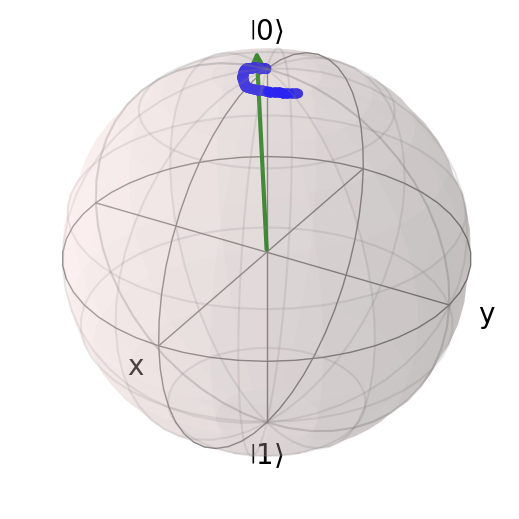

In [20]:
b = Bloch()
irho_mid = np.matrix(irho_init)
point_list = []
z = []
y = []
x = []

for i in combination:
    instant_U = unitary(dt, i)
    irho_mid = (instant_U @ irho_mid @ instant_U.conj().T)
    point = [np.trace(irho_mid * sx).real,
             np.trace(irho_mid * sy).real,
             np.trace(irho_mid * sz).real]
    b.add_points(point, 'm')
    print(point)
    z.append(np.trace(irho_mid * sz).real)
    y.append(np.trace(irho_mid * sy).real)
    x.append(np.trace(irho_mid * sx).real)
    point_list.append(point)
    print(state_fidelity(irho_target, irho_mid))

vector = np.array([np.trace(irho_target @ sx).real,
                    np.trace(irho_target @ sy).real,
                    np.trace(irho_target @ sz).real])

# print("#############################")
# print(z)
# print(y)
# print(x)
# print(state_fidelity(irho_target, irho_mid))
# print(irho_target)
# irho_target = np.array(irho_target)
# print(type(irho_target), irho_target.shape())
# print(irho_mid)
# print(vector)

b.vector_color=['g']
b.add_vectors(vector)
# b.vector_color=['g']
# b.add_vectors([0,0,1],colors = 'r')
b.point_marker = ['o']
b.show()

In [21]:
state_fidelity(irho_mid, irho_target)

0.892498651374193